MST
UID:18BCS6074  

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading files to drive
from google.colab import files
uploaded = files.upload()

Saving A2.csv to A2.csv


In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [4]:
# Importing csv file
df = pd.read_csv('A2.csv', encoding='unicode_escape')
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Head Size(cm^3)      237 non-null    int64
 1   Brain Weight(grams)  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


In [9]:
df.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [6]:
df.shape

(237, 2)

**1. Check for missing values**

In [7]:
# Looking for null values
round(df.isnull().sum()/len(df.index)*100,2)

Head Size(cm^3)        0.0
Brain Weight(grams)    0.0
dtype: float64

**2. Checking for outliers**

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [8]:
# Importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

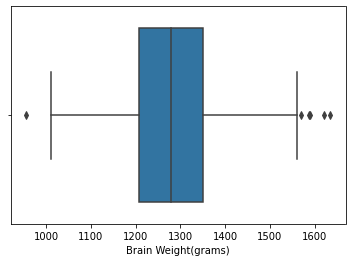

In [11]:
# Boxplot
sns.boxplot(df['Brain Weight(grams)'])

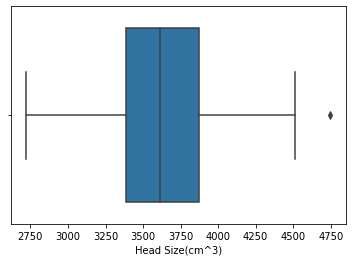

In [12]:
sns.boxplot(df['Head Size(cm^3)'])

In [13]:
col = df.select_dtypes(include=['int64'])

In [14]:
for x in col:
    ten = df[x].quantile(0.10)
    nin = df[x].quantile(0.90)
    df[x] = np.where(df[x] < ten, ten,df[x])
    df[x] = np.where(df[x] > nin, nin,df[x])

In [15]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

Head Size(cm^3)        487.0
Brain Weight(grams)    143.0
dtype: float64


In [16]:
df_out = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(237, 2)


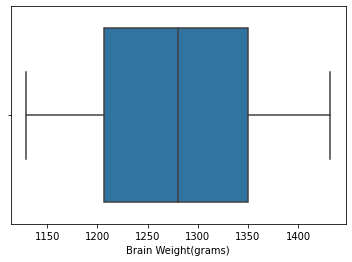

In [17]:
sns.boxplot(df['Brain Weight(grams)'])

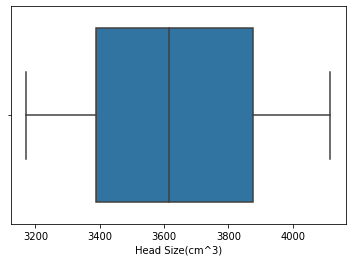

In [18]:
sns.boxplot(df['Head Size(cm^3)'])

In [20]:
X = df_out.iloc[:,:-1].values
y = df_out.iloc[:,1].values

**3. Model Building.**

In [21]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31,random_state=101)

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
import statsmodels.api as sm
lm = sm.OLS(y_train,X_train).fit()

In [28]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          6.030e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                   2.95e-210
Time:                        06:35:25   Log-Likelihood:                         -915.18
No. Observations:                 163   AIC:                                      1832.
Df Residuals:                     162   BIC:                                      1835.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
import statsmodels.api as sm
lm = sm.OLS(y_test,X_test).fit()

In [34]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.627e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                    4.22e-95
Time:                        06:54:51   Log-Likelihood:                         -416.85
No. Observations:                  74   AIC:                                      835.7
Df Residuals:                      73   BIC:                                      838.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**4. Model Evaluation**

In [29]:
predictions = lm.predict(X_test)

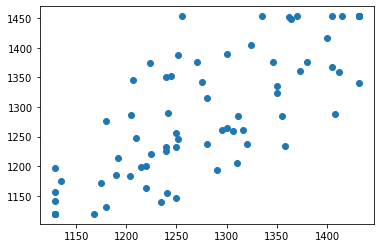

In [30]:
plt.scatter(y_test,predictions)

In [31]:
# Regression Evaluation Metrics
from sklearn import metrics

In [32]:
print('MAE:' , metrics.mean_absolute_error(y_test,predictions))
print('MSE:' , metrics.mean_squared_error(y_test,predictions))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 53.53143624374527
MSE: 4709.43998707502
RMSE: 68.6253596498774
